In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can see that our dataset has 1338 rows and 7 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that there are 3 columns of object datatype.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

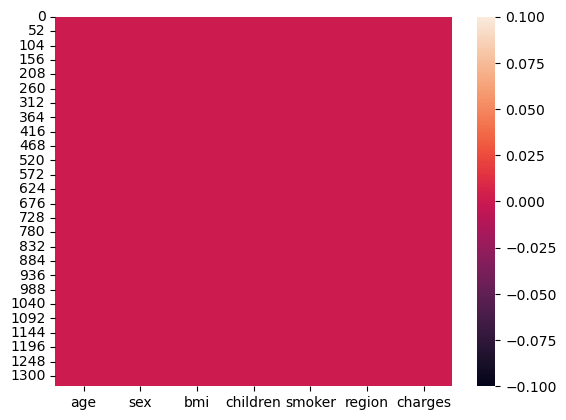

In [9]:
sns.heatmap(df.isnull())

We can see that there are no null values in the dataset.

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


df.describe() gives statistical summary for the numerical columns. There are no negative values present in the statistical summary.

From the above statistical summary, we can observe the following:
1. Using the describe method We can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.
2. The counts of all the columns are the same which means there are no missing values in the dataset.
3. The mean value is almost equal to the median (50%) value in most of the columns except for the target variable which means data is normally skewed for most of the columns.
4. There are huge differences between 75% and maximum values in bmi and charges columns. There must be outliers present in the data.

In [19]:
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [39]:
df.duplicated().sum()

1

Through this, we can find out the number of duplicated values in the dataset and remove it.

In [40]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Data Visualization

<Axes: xlabel='charges', ylabel='Density'>

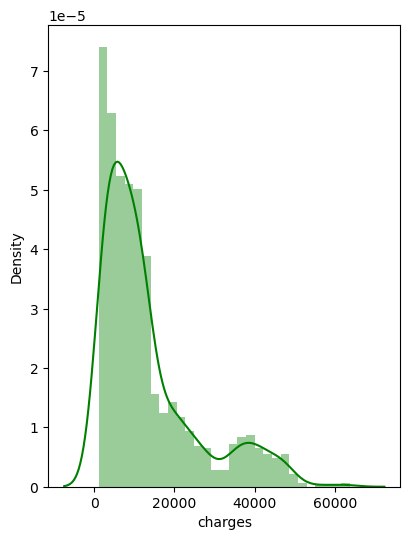

In [42]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.distplot(df['charges'], color = 'g')

The charges column is skewed to the right.

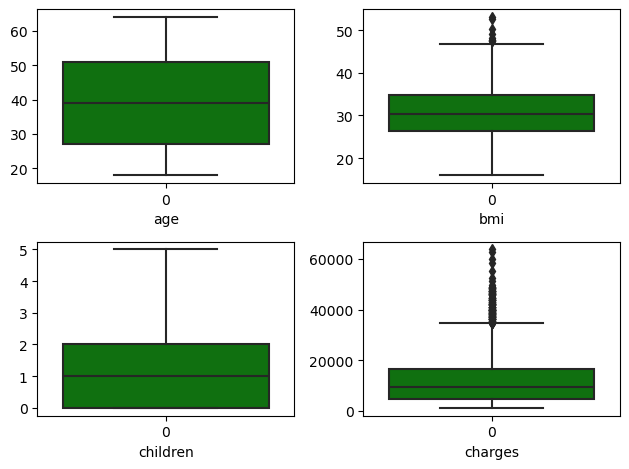

In [43]:
numerical_columns=['age','bmi','children','charges']
p=1
for i in numerical_columns:
    if p<=4:
        a=plt.subplot(2,2,p)
        sns.boxplot(df[i],color='g')
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    p+=1
plt.tight_layout()

We can see that there aren't much outliers in the columns except for the bmi and charges columns.

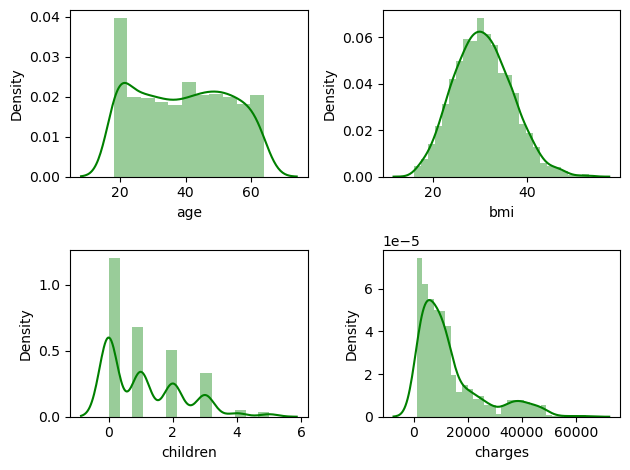

In [34]:
p=1
for i in numerical_columns:
    if p<=4:
        a=plt.subplot(2,2,p)
        sns.distplot(df[i],color='g')
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    p+=1
plt.tight_layout()

We can see that they have almost normal distributions.

<Axes: xlabel='region', ylabel='charges'>

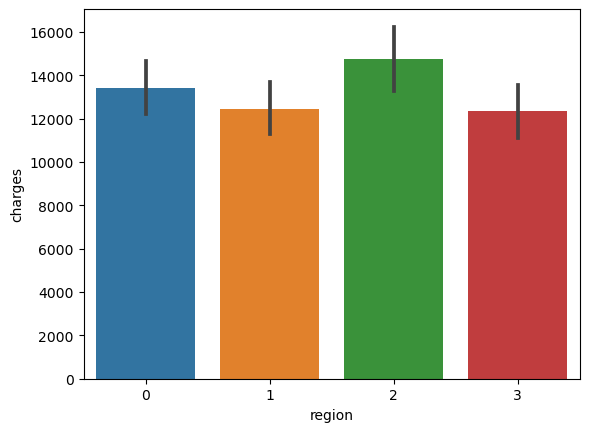

In [44]:
sns.barplot(x ='region', y ='charges', data = df)

We can see that the region 2 i.e. southeast region has higher medical charges.

<Axes: xlabel='sex', ylabel='charges'>

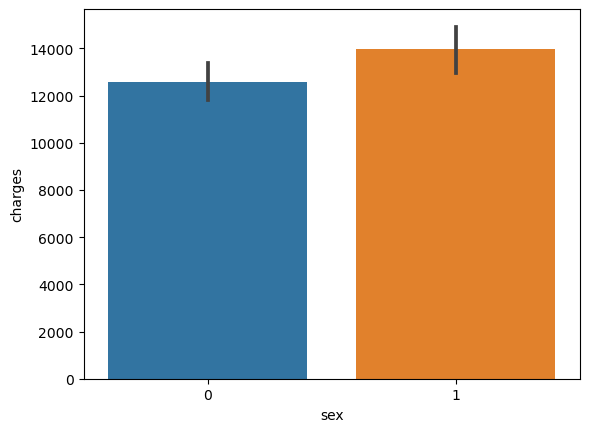

In [45]:
sns.barplot(x ='sex', y ='charges', data = df)

We can see that number of males are higher than the number of females.

<Axes: xlabel='smoker', ylabel='charges'>

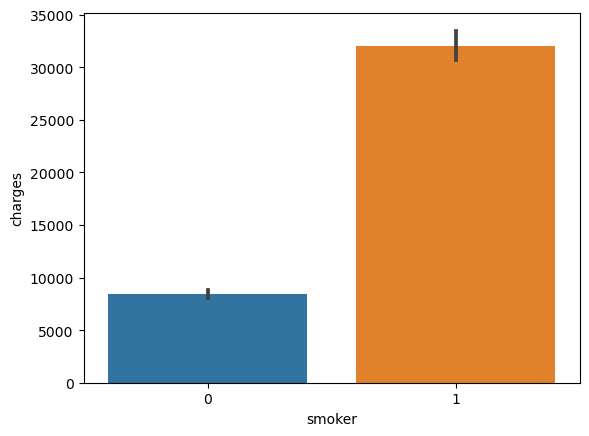

In [46]:
sns.barplot(x ='smoker', y ='charges', data = df)

There are more number of non smokers than smokers.

# Outlier removal

We are removing outliers using z score methods which follows the below steps.

In [48]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


We have removed the outliers, we can see that the dataset is reduced.

In [49]:
df.shape

(1308, 7)

In [53]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018180,0.118272,0.058142,-0.029671,0.002619,0.304541
sex,-0.018180,1.000000,0.042514,0.014774,0.079479,0.003434,0.060242
bmi,0.118272,0.042514,1.000000,0.029927,-0.005289,0.160139,0.191523
children,0.058142,0.014774,0.029927,1.000000,0.028498,-0.003303,0.099814
smoker,-0.029671,0.079479,-0.005289,0.028498,1.000000,-0.003651,0.785115
region,0.002619,0.003434,0.160139,-0.003303,-0.003651,1.000000,-0.007978
charges,0.304541,0.060242,0.191523,0.099814,0.785115,-0.007978,1.000000


There is negative correlation between region and charges. 

Dividing the dataset into X and Y:

In [56]:
x=df.drop(['charges'],axis=1)
y=df['charges']

Finding the best random state by finding out the maximum R2 score:

In [59]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score: ",maxAccu," on random state ",maxRS)

Maximum r2 score:  0.8250853352804666  on random state  60


Splitting the dataset into training data and testing data:

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

Linear Regression

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
predtrain=lr.predict(x_train)
print(lr)
print('R2 Score: ',r2_score(y_test,predlr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predlr))
print('Mean Squared Error: ',mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
R2 Score:  0.8250853352804666
R2 Score on training data:  0.7318076133321468
Mean Absolute Error:  3659.652626581927
Mean Squared Error:  26643737.16581418
Root Mean Squared Error:  5161.757178114269


Random Forest Regressor

In [65]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
predtrain=rfr.predict(x_train)
print(rfr)
print('R2 Score: ',r2_score(y_test,predrfr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predrfr))
print('Mean Squared Error: ',mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
R2 Score:  0.9014970166058185
R2 Score on training data:  0.9743754582332461
Mean Absolute Error:  2248.7224121045824
Mean Squared Error:  15004388.590352684
Root Mean Squared Error:  3873.5498693514564


Decision Tree Regressor

In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
predtrain=dtr.predict(x_train)
print(dtr)
print('R2 Score: ',r2_score(y_test,preddtr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preddtr))
print('Mean Squared Error: ',mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preddtr)))

DecisionTreeRegressor()
R2 Score:  0.7760367135023258
R2 Score on training data:  1.0
Mean Absolute Error:  2640.751016793893
Mean Squared Error:  34115029.46196134
Root Mean Squared Error:  5840.8072611550315


K Neighbors Regressor:

In [67]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predtrain=knn.predict(x_train)
print(knn)
print('R2 Score: ',r2_score(y_test,predknn))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predknn))
print('Mean Squared Error: ',mean_squared_error(y_test,predknn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
R2 Score:  0.1822041961993991
R2 Score on training data:  0.382695697498907
Mean Absolute Error:  7955.333179364886
Mean Squared Error:  124570095.29021883
Root Mean Squared Error:  11161.097405283175


Lasso:

In [68]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
predtrain=l.predict(x_train)
print(l)
print('R2 Score: ',r2_score(y_test,predl))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predl))
print('Mean Squared Error: ',mean_squared_error(y_test,predl))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predl)))

Lasso()
R2 Score:  0.8250568191697178
R2 Score on training data:  0.731807516662605
Mean Absolute Error:  3660.2102550452305
Mean Squared Error:  26648080.85970056
Root Mean Squared Error:  5162.177918253163


Ridge:

In [69]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
predtrain=r.predict(x_train)
print(r)
print('R2 Score: ',r2_score(y_test,predr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predr))
print('Mean Squared Error: ',mean_squared_error(y_test,predr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predr)))

Ridge()
R2 Score:  0.8243363648717755
R2 Score on training data:  0.7317859364893067
Mean Absolute Error:  3675.2263638077766
Mean Squared Error:  26757823.487542175
Root Mean Squared Error:  5172.796486190247


Support Vector Regressor:

In [80]:
s=SVR()
s.fit(x_train,y_train)
preds=s.predict(x_test)
predtrain=s.predict(x_train)
print(s)
print('R2 Score: ',r2_score(y_test,preds))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preds))
print('Mean Squared Error: ',mean_squared_error(y_test,preds))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preds)))

SVR()
R2 Score:  -0.07281532165850013
R2 Score on training data:  -0.09420023084652795
Mean Absolute Error:  8251.901462731917
Mean Squared Error:  163415740.49014208
Root Mean Squared Error:  12783.416620377437


Gradient Boosting Regressor:

In [71]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
predtrain=gbr.predict(x_train)
print(gbr)
print('R2 Score: ',r2_score(y_test,predgbr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predgbr))
print('Mean Squared Error: ',mean_squared_error(y_test,predgbr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predgbr)))

GradientBoostingRegressor()
R2 Score:  0.9257854764023761
R2 Score on training data:  0.88854157414276
Mean Absolute Error:  2017.9254998571653
Mean Squared Error:  11304668.272336043
Root Mean Squared Error:  3362.2415547274477


In [74]:
s=cross_val_score(lr,x,y)
print(s)
print(s.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predlr)-s.mean())

[0.7633674  0.71275448 0.77995497 0.73048268 0.7662308 ]
0.7505580662519831
Difference between R2 score and cross validation score:  0.0745272690284835


In [75]:
s1=cross_val_score(rfr,x,y)
print(s1)
print(s1.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predrfr)-s1.mean())

[0.85164398 0.78160171 0.84637242 0.83083305 0.85150282]
0.8323907950505584
Difference between R2 score and cross validation score:  0.06910622155526014


In [76]:
s2=cross_val_score(dtr,x,y)
print(s2)
print(s2.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,preddtr)-s2.mean())

[0.77625528 0.64975108 0.62190363 0.74015862 0.64112752]
0.6858392253695438
Difference between R2 score and cross validation score:  0.09019748813278206


In [77]:
s3=cross_val_score(knn,x,y)
print(s3)
print(s3.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predknn)-s3.mean())

[0.15626355 0.04778171 0.06105343 0.10229236 0.15970722]
0.10541965372767348
Difference between R2 score and cross validation score:  0.07678454247172561


In [78]:
s4=cross_val_score(l,x,y)
print(s4)
print(s4.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predl)-s4.mean())

[0.76338266 0.71277156 0.7799302  0.730497   0.76622424]
0.7505611318690282
Difference between R2 score and cross validation score:  0.07449568730068967


In [79]:
s5=cross_val_score(r,x,y)
print(s5)
print(s5.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predr)-s5.mean())

[0.76339395 0.71285013 0.77939912 0.73095095 0.76604017]
0.750526864572213
Difference between R2 score and cross validation score:  0.07380950029956257


In [81]:
s6=cross_val_score(s,x,y)
print(s6)
print(s6.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,preds)-s6.mean())

[-0.11467512 -0.11141436 -0.07285578 -0.09988027 -0.10697302]
-0.10115971090341214
Difference between R2 score and cross validation score:  0.028344389244912005


In [82]:
s7=cross_val_score(gbr,x,y)
print(s7)
print(s7.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predgbr)-s7.mean())

[0.87665985 0.80510939 0.88121711 0.84915641 0.86334098]
0.8550967495967855
Difference between R2 score and cross validation score:  0.07068872680559057


Gradient Boosting Regression is the best model

In [83]:
final_model=gbr

In [84]:
import joblib
filename = "FinalModel.pkl"
joblib.dump(final_model, filename)

['FinalModel.pkl']